## Import Library

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.color import rgb2hsv
from skimage.feature import graycomatrix, graycoprops #untuk glcm

C:\Users\kashrina\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


## Import gambar

In [2]:
image = cv2.imread ("Asset/1.jpg")

## RGB to HSV

In [3]:
hsv_image = rgb2hsv(image)

Text(0.5, 1.0, 'Gambar yang udah')

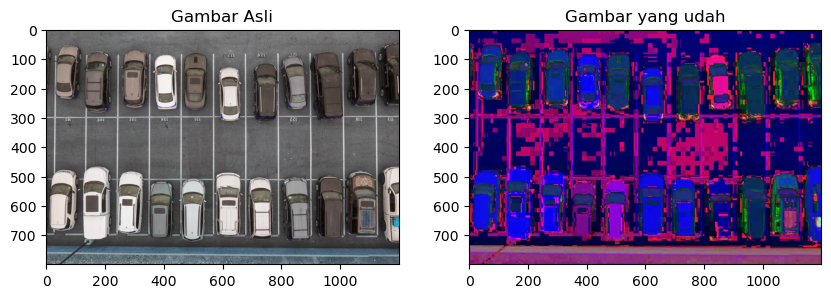

In [4]:
fig,axs = plt.subplots(1,2,figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(image)
ax[0].set_title("Gambar Asli")

ax[1].imshow(hsv_image, cmap = "hsv")
ax[1].set_title("Gambar yang udah")

## Split H-S-V

In [5]:
hue = hsv_image[:, :, 0] 
saturation = hsv_image[:, :, 1]
value  = hsv_image[:, :, 2]

Text(0.5, 1.0, 'Value')

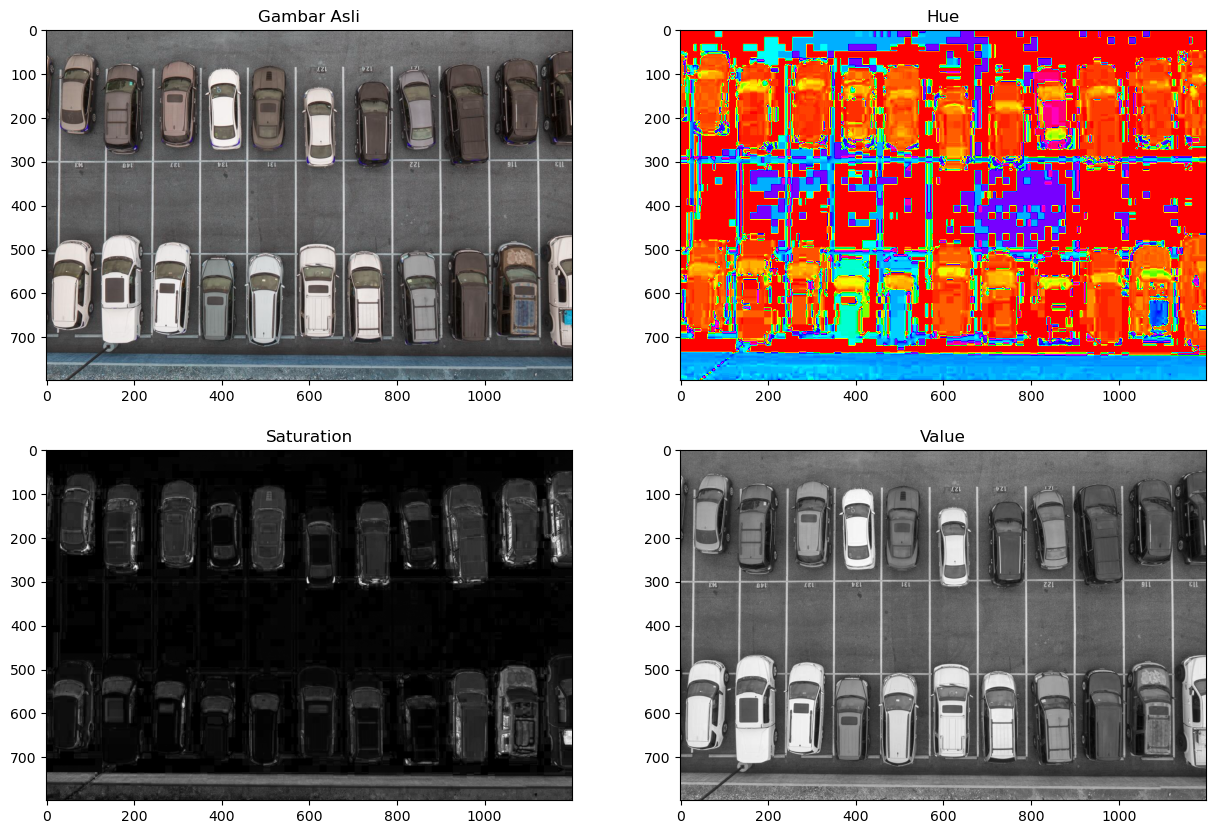

In [6]:
fig,axs = plt.subplots(2,2,figsize = (15,10))
ax = axs.ravel()

axs[0,0].imshow(image)
axs[0,0].set_title("Gambar Asli")

axs[0,1].imshow(hue, cmap = "hsv")
axs[0,1].set_title("Hue")

axs[1,0].imshow(saturation, cmap = "gray")
axs[1,0].set_title("Saturation")

axs[1,1].imshow(value, cmap = "gray")
axs[1,1].set_title("Value")

## Menghitung mean dan standar deviasi

In [7]:
mean = np.mean(hsv_image.ravel())
std = np.std(hsv_image.ravel())

print(mean,std)

0.24630077761266558 0.2586245188715652


## Konversi HSV channels

In [8]:
hue_channel = (hsv_image[:, :, 0] * 255).astype('uint8')
saturation_channel = (hsv_image[:, :, 1] * 255).astype('uint8')
value_channel = (hsv_image[:, :, 2] * 255).astype('uint8')

## Fungsi untuk menghitung GLCM

In [9]:
def compute_glcm_features(channel):
    glcm = graycomatrix(channel, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')
    dissimilarity = graycoprops(glcm, 'dissimilarity')
    homogeneity = graycoprops(glcm, 'homogeneity')
    energy = graycoprops(glcm, 'energy')
    correlation = graycoprops(glcm, 'correlation')
    return contrast, dissimilarity, homogeneity, energy, correlation

## Menampilkan nilai yang ada di hue_channel

In [10]:
hue_features = compute_glcm_features(hue_channel)

# Akses nilai fitur pada channel Hue
print("Fitur pada channel Hue:")
print(f"Kontras: {hue_features[0]}")
print(f"Dissimilarity: {hue_features[1]}")
print(f"Homogenitas: {hue_features[2]}")
print(f"Energi: {hue_features[3]}")
print(f"Korelasi: {hue_features[4]}")

Fitur pada channel Hue:
Kontras: [[1603.64861832]]
Dissimilarity: [[9.42726365]]
Homogenitas: [[0.78601937]]
Energi: [[0.36229911]]
Korelasi: [[0.86944232]]


## Menampilkan nilai yang ada di saturation_channel

In [11]:
hue_features = compute_glcm_features(saturation_channel)

# Akses nilai fitur pada channel Saturation
print("Fitur pada channel Saturation:")
print(f"Kontras: {hue_features[0]}")
print(f"Dissimilarity: {hue_features[1]}")
print(f"Homogenitas: {hue_features[2]}")
print(f"Energi: {hue_features[3]}")
print(f"Korelasi: {hue_features[4]}")

Fitur pada channel Saturation:
Kontras: [[77.42101835]]
Dissimilarity: [[3.33493911]]
Homogenitas: [[0.60435991]]
Energi: [[0.25480713]]
Korelasi: [[0.95175922]]


## Menampilkan nilai yang ada di value_channel

In [12]:
hue_features = compute_glcm_features(value_channel)

# Akses nilai fitur pada channel Value
print("Fitur pada channel Value:")
print(f"Kontras: {hue_features[0]}")
print(f"Dissimilarity: {hue_features[1]}")
print(f"Homogenitas: {hue_features[2]}")
print(f"Energi: {hue_features[3]}")
print(f"Korelasi: {hue_features[4]}")

Fitur pada channel Value:
Kontras: [[344.92284246]]
Dissimilarity: [[8.84701999]]
Homogenitas: [[0.24926575]]
Energi: [[0.02547765]]
Korelasi: [[0.92595674]]
